In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from tensorflow.keras.metrics import categorical_crossentropy

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error



In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#load dataset 
path='/content/drive/MyDrive/ds_heart/heart_disease_binary.csv'
df=pd.read_csv(path)

df.head()

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
#drop samples with missing values
df.isnull().sum()

age        0
sex        0
cp         0
testbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         4
thal       2
target     0
dtype: int64

In [ ]:
df.shape

(303, 14)

In [ ]:
data=df.dropna()

In [ ]:
data.head()

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
data.shape

(297, 14)

<Figure size 1440x1440 with 0 Axes>

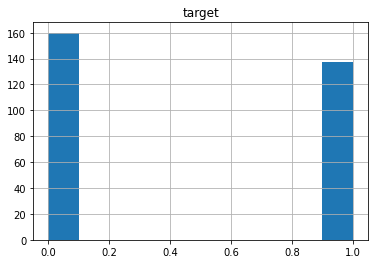

In [ ]:
plt.figure(figsize=(20,20))
data.hist('target')
plt.show('target')

In [ ]:
data['target'].value_counts() 

0    160
1    137
Name: target, dtype: int64

In [ ]:
data.describe()

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [ ]:
from sklearn import preprocessing

x=data.drop('target', axis=1)
y=data['target']

In [ ]:
#get dummy variables
x=pd.get_dummies(x, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
#scale
standardScaler = StandardScaler()
columns_to_scale = ['age', 'testbps', 'chol', 'thalach', 'oldpeak']
x[columns_to_scale] = standardScaler.fit_transform(x[columns_to_scale])

In [ ]:
x.head()

,age,testbps,chol,thalach,oldpeak,sex_0,sex_1,cp_1,cp_2,cp_3,...,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.936181,0.750380,-0.276443,0.017494,1.068965,0,1,1,0,0,...,0,0,1,1,0,0,0,0,1,0
1,1.378929,1.596266,0.744555,-1.816334,0.381773,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,0,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0


In [ ]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

 x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=5)

In [ ]:
x_train.shape,x_test.shape,x_val.shape,y_train.shape,y_test.shape,y_val.shape

((177, 28), (60, 28), (60, 28), (177,), (60,), (60,))

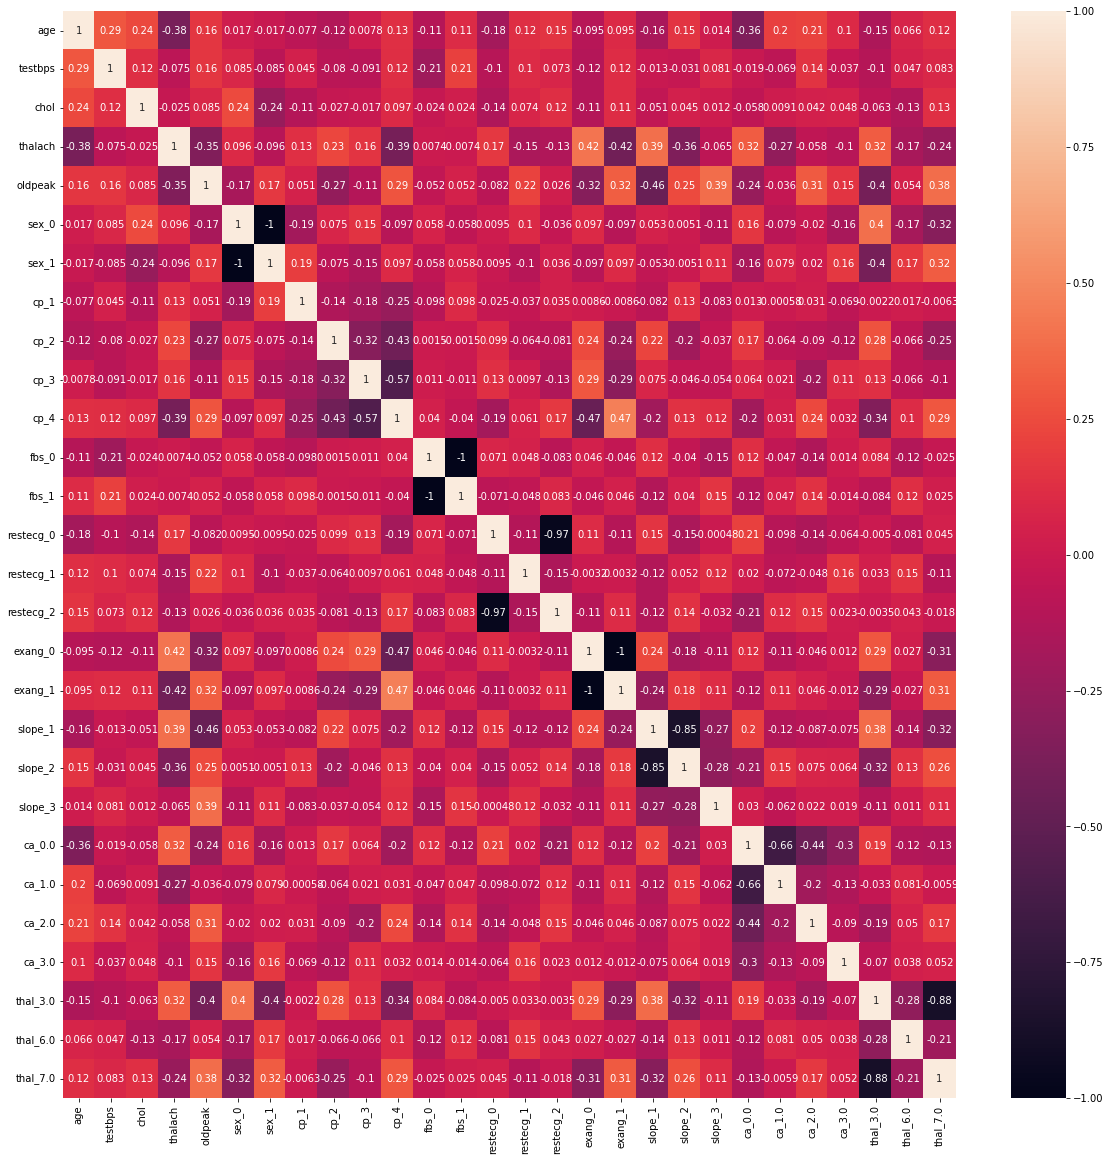

In [ ]:
##plot the correlation matrix##
plt.figure(figsize=(20,20))
cor = x_train.corr()
sns.heatmap(cor, vmin=-1,vmax=1, annot=True)
plt.show()

In [ ]:
#feature selection
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(x_train, 0.3)
len(set(corr_features))

17

In [ ]:
corr_features

{'ca_0.0',
 'ca_1.0',
 'ca_2.0',
 'cp_3',
 'cp_4',
 'exang_0',
 'exang_1',
 'fbs_1',
 'oldpeak',
 'restecg_2',
 'sex_1',
 'slope_1',
 'slope_2',
 'slope_3',
 'thal_3.0',
 'thal_7.0',
 'thalach'}

In [ ]:
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)
x_val.drop(corr_features, axis=1)

,age,testbps,chol,sex_0,cp_1,cp_2,fbs_0,restecg_0,restecg_1,ca_3.0,thal_6.0
95,-0.281376,-0.208291,0.147367,0,0,0,1,1,0,0,0
54,0.604120,-0.095506,0.108839,0,0,0,1,1,0,0,0
102,0.272059,-0.208291,1.072045,1,0,0,1,0,0,0,0
131,-0.392063,-2.125634,-0.392028,0,0,0,1,1,0,0,0
241,-1.498933,-0.321076,1.129838,1,0,1,1,1,0,0,0
141,0.493433,2.160191,0.783083,0,1,0,1,0,0,0,0
262,0.604120,1.032342,-0.141595,1,1,0,1,1,0,0,0
27,1.268242,1.032342,-0.411292,1,1,0,1,1,0,0,0
1,1.378929,1.596266,0.744555,0,0,0,1,0,0,1,0
193,0.825494,0.355633,0.898668,1,0,0,0,1,0,1,0


In [ ]:

def ANN_bmodel():
    model = Sequential()

    model.add(Dense(32, input_shape = (x_train.shape[1],)))    
    
    model.add(Dense(120,Activation('relu')))                         
    
    
    model.add(Dense(120, Activation('relu')))                                               

    
    model.add(Dense(1, Activation('sigmoid')))                         
    

    learning_rate = 0.0001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model

model = ANN_bmodel()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                928       
                                                                 
 dense_13 (Dense)            (None, 120)               3960      
                                                                 
 dense_14 (Dense)            (None, 120)               14520     
                                                                 
 dense_15 (Dense)            (None, 1)                 121       
                                                                 
Total params: 19,529
Trainable params: 19,529
Non-trainable params: 0
_________________________________________________________________


In [ ]:


EPOCHS = 100
batch_size = 16 


history = model.fit(x_train, y_train, batch_size = batch_size,epochs=EPOCHS, verbose=1,shuffle=True,validation_data = (x_val, y_val))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 1s 16ms/step - loss: 0.6874 - accuracy: 0.5650 - val_loss: 0.6380 - val_accuracy: 0.7167
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6384 - val_loss: 0.6033 - val_accuracy: 0.8167
Epoch 3/100
 1/12 [=>............................] - ETA: 0s - loss: 0.5654 - accuracy: 0.8125

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 0s 5ms/step - loss: 0.6179 - accuracy: 0.7345 - val_loss: 0.5730 - val_accuracy: 0.8500
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5902 - accuracy: 0.7853 - val_loss: 0.5478 - val_accuracy: 0.8500
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5653 - accuracy: 0.8079 - val_loss: 0.5253 - val_accuracy: 0.8333
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5426 - accuracy: 0.8079 - val_loss: 0.5061 - val_accuracy: 0.8167
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5231 - accuracy: 0.8136 - val_loss: 0.4901 - val_accuracy: 0.8333
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5054 - accuracy: 0.8023 - val_loss: 0.4773 - val_accuracy: 0.8167
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4889 - accuracy: 0.8023 - val_loss: 0.4657 - val_accuracy: 0.8167
Epoch 10/100
12/12 [=====

In [ ]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
95,0.203743,0.920904,0.505806,0.750000,95
96,0.201954,0.932203,0.496716,0.766667,96
97,0.201668,0.932203,0.498023,0.766667,97
98,0.200523,0.937853,0.503122,0.750000,98
99,0.199027,0.937853,0.505020,0.750000,99


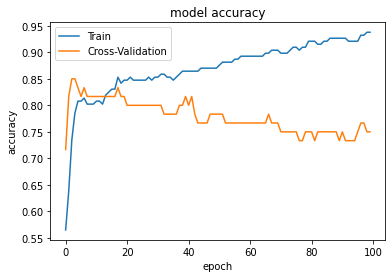

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

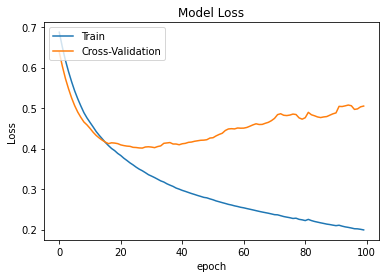

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [ ]:
print('Train Split: ')
loss, accuracy = model.evaluate(x_train, y_train, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))

Train Split: 
6/6 [==============================] - 0s 1ms/step - loss: 0.1977 - accuracy: 0.9379
Accuracy   :  0.94 


In [ ]:
print('Evaluation Split: ')
loss, accuracy =  model.evaluate(x_val, y_val, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Evaluation Split: 
2/2 - 0s - loss: 0.5050 - accuracy: 0.7500 - 18ms/epoch - 9ms/step
Accuracy   :  0.75 


In [ ]:
print('Test Split: ')
loss, accuracy =  model.evaluate(x_test, y_test, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Test Split: 
2/2 - 0s - loss: 0.3410 - accuracy: 0.8833 - 18ms/epoch - 9ms/step
Accuracy   :  0.88 


In [ ]:
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
print('the model performance')
print('------------------------------')
print('MSE is {}'.format(mse))
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))


the model performance
------------------------------
MSE is 0.0927623524020653
MAE is 0.1810369536280632
RMSE is 0.3045691258188612


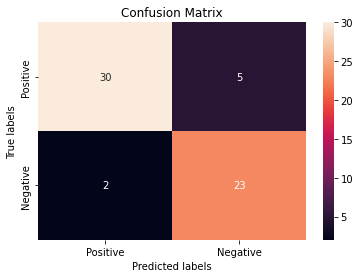

In [ ]:
from sklearn.metrics import confusion_matrix


ax= plt.subplot()
predict_results = model.predict(x_test)

predict_results = (predict_results > 0.5)

cm = confusion_matrix(y_test, predict_results)

sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);